What is machine learning?
Arthur Samuel(1959):is a American computer scientist, pioneer in the field of computer gaming and AI, he is the one who popularized the term 'machine learning'
according to him its a field of study that gives computers the ability to learn without explicitly programmed.

Tom Mitchell(1998):computer scientist wrote books on Machine learning,defined ML as a well-posed learning problem.
A computer program is said to learn from experience E with respect to some task T and some performance measure P,if its performance on T, as a measured by P,improves with experience E.

In [71]:
#! pip install pymatgen
#! pip install matminer

In [72]:
import numpy as np
from pymatgen.core import Structure
import pymatgen
from pymatgen.ext.matproj import MPRester
import pandas as pd
from pymatgen.core.composition import Composition
import matminer
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error as MSE
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import matminer
#from pymatgen.io.cif import CifParser
#from pymatgen.core.structure import Cifwriter
from pymatgen.core.structure import Structure

In [73]:
api='D32oOhE5YEc2fubxEdCv1khjg6EBIfCL'
with MPRester(api) as mpr:
    search_results4=mpr.summary.search(formula='ABO3',is_gap_direct="True",is_stable="True",fields=["structure","composition","formation_energy_per_atom","formula_pretty","band_gap"])

Retrieving SummaryDoc documents:   0%|          | 0/167 [00:00<?, ?it/s]

In [74]:
#search_results4

In [75]:
data_list=[]
for result in search_results4:
    data_dict={}
    data_dict['structure']=result.structure
    data_dict['composition']=result.composition.reduced_formula
    data_dict['bandgap']=result.band_gap
    data_list.append(data_dict)

In [76]:
#data_list

In [77]:
data_table=pd.DataFrame(data_list)

In [78]:
#data_table

Note :we are going to apply matminer featurizers to generate featurizers based on structure and composition,but the composition is not in pymatgen composition format, convert it into pymatgen composition format.

In [79]:
data_table["composition"]=data_table["composition"].apply(lambda x:Composition(x))

In [80]:
#data_table


In [81]:
#data_table=data_table.drop(["composition"],axis=1)

In [82]:
#data_table

https://hackingmaterials.lbl.gov/matminer/

In [83]:
#from matminer.featurizers.conversions import StructureToComposition
#comp=StructureToComposition()
#data_table=comp.featurize_dataframe(data_table,col_id='structure',ignore_errors=True)

In [84]:
#data_table

In [85]:
from matminer.featurizers.composition import ElementFraction
ef = ElementFraction()
feat1=ef.featurize_dataframe(data_table,col_id='composition')

from matminer.featurizers.structure.bonding import StructuralHeterogeneity
cou=StructuralHeterogeneity()
cou.fit(data_table['structure'])
feat2=cou.featurize_dataframe(data_table,col_id='structure',ignore_errors=True)

from matminer.featurizers.conversions import CompositionToOxidComposition
oxy= CompositionToOxidComposition()
feat3=oxy.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)


from matminer.featurizers.composition.ion import OxidationStates
oxida=OxidationStates()
feat4=oxida.featurize_dataframe(feat3,col_id='composition_oxid',ignore_errors=True)


from matminer.featurizers.composition.ion import IonProperty
ostafea= IonProperty()
feat5=ostafea.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)

from matminer.featurizers.composition.orbital import ValenceOrbital
val=ValenceOrbital()
feat6=val.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)

from matminer.featurizers.composition.element import TMetalFraction
met=TMetalFraction()
feat7=met.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)


from matminer.featurizers.composition.element import Stoichiometry
stoich = Stoichiometry()
feat8=stoich.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)



ElementFraction:   0%|          | 0/167 [00:00<?, ?it/s]

StructuralHeterogeneity:   0%|          | 0/167 [00:00<?, ?it/s]

CompositionToOxidComposition:   0%|          | 0/167 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/167 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/167 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/167 [00:00<?, ?it/s]

TMetalFraction:   0%|          | 0/167 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/167 [00:00<?, ?it/s]

In [86]:
# Concatenate the datasets horizontally
combined_df = pd.concat([feat1, feat2, feat3,feat4,feat5,feat6,feat7,feat8], axis=1)

# Identify duplicate column names
duplicate_cols = combined_df.columns[combined_df.columns.duplicated()]

# Select only the unique columns
unique_cols = combined_df.loc[:, ~combined_df.columns.duplicated()]

# Save the new dataset
#unique_cols.to_csv('unique_dataset.csv', index=False)

In [108]:
pd.set_option('display.max_columns',None)

In [109]:
feat_table=unique_cols.drop(["structure","composition","compound possible","composition_oxid"],axis=1)

In [110]:
#feat_table

In [111]:
#feat_table.columns

In [112]:
feat_table=feat_table.dropna()

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [114]:
y=feat_table.pop('bandgap')
x=feat_table

In [115]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


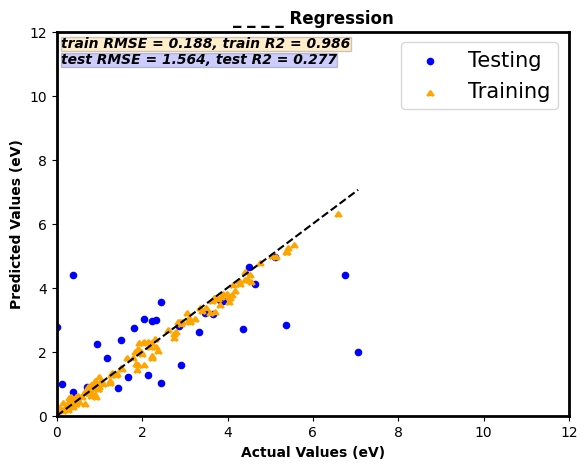

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Instantiate model
model = GradientBoostingRegressor()
# Fit model to training data
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

import matplotlib.pyplot as plt
import numpy as np

# Calculate the evaluation metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
#print(f"Training RMSE: {train_rmse:.3f}")
#print(f"Testing RMSE: {test_rmse:.3f}")
#print(f"Training R^2: {train_r2:.3f}")
#print(f"Testing R^2: {test_r2:.3f}")

# Plot the graph with automatic values
plt.scatter(y_test, y_pred_test, color='blue', label='Testing', s=20)
plt.text(.1, 11.5, f'train RMSE = {train_rmse:.3f}, train R2 = {train_r2:.3f}', style='italic', bbox={
       'facecolor': 'orange', 'alpha': 0.2, 'pad': .1}, fontweight='bold')
plt.text(.1, 11, f'test RMSE = {test_rmse:.3f}, test R2 = {test_r2:.3f}', style='italic', bbox={
        'facecolor': 'blue', 'alpha': 0.2, 'pad': .1}, fontweight='bold')
plt.scatter(y_train, y_pred_train, color='orange', label='Training', marker=6, linewidths=2, s=20)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.subplots_adjust(left=0.15, bottom=0.15, top=.95, right=0.95)
plt.ylim([0, 12])
plt.xlim([0, 12])

# Set bold font for all text elements
plt.title('_ _ _ _ Regression', fontweight='bold')
plt.xlabel('Actual Values (eV)', fontweight='bold')
plt.ylabel('Predicted Values (eV)', fontweight='bold')
plt.legend(fontsize=15)

# Set bold frame for the plot
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

#plt.savefig('finalCatBoost10kmodel.png', dpi=550, bbox_inches='tight')
#plt.show()



Root Mean Squared Error (RMSE):RMSE is a measure of the average prediction error of a regression model. It calculates the square root of the average of the squared differences between the predicted values and the actual values
R^2: also known as the coefficient of determination, measures the proportion of the variance in the target variable that can be explained by the regression model. It indicates how well the model fits the data and ranges from 0 to 1.

Generally Lower the RMSE and higher the R^2 value on test data the better the model performance of the model

Try with different models and find the best model using the above parameters

In [101]:
feature_importance=model.feature_importances_

sorted_idx=feature_importance.argsort()

feature_labels= feat_table.columns

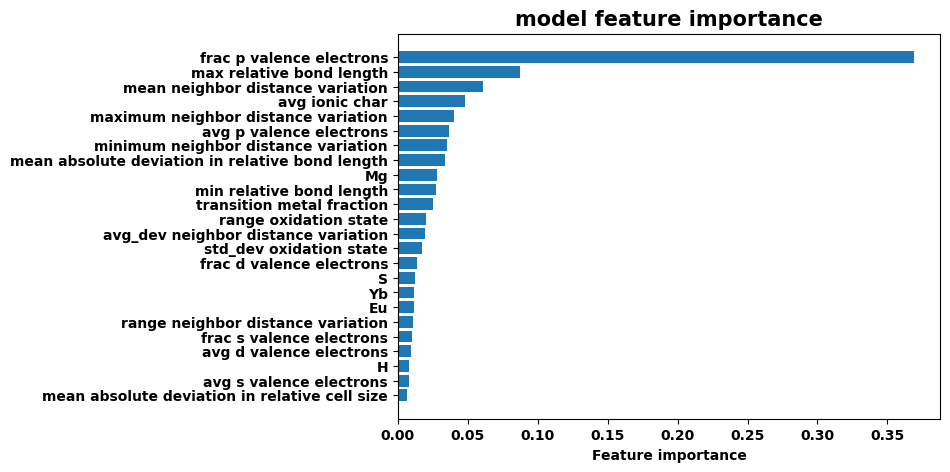

In [102]:
feature_importance = model.feature_importances_
mask = feature_importance >= 0.005# set the threshold to 5
important_features = np.array(feature_labels)[mask]
important_importance = feature_importance[mask]
sorted_idx = important_importance.argsort() # sort in descending order

plt.figure(figsize=(7, 5))
plt.xlabel("Feature importance", fontsize=10,fontweight="bold")
plt.title("model feature importance",fontsize=15,fontweight="bold")

plt.barh(range(len(important_features)), important_importance[sorted_idx])
plt.yticks(range(len(important_features)), important_features[sorted_idx],fontsize=10,fontweight="bold")
plt.xticks(fontsize=10, fontweight='bold')
y_max = len(important_features)
#plt.savefig('alDTBoostfeat10k.png',dpi=550,bbox_inches='tight')
#plt.show()


In [98]:
#import joblib

In [ ]:
#joblib.dump(model,'model')